In [1]:
from google.colab import drive
drive.mount('/content/drive')

basedir ='/content/drive/MyDrive/MB/'
dataset_dir = "/content/drive/My Drive/"
images_dir = '/content/drive/My Drive/Flickr8k_Dataset/Flicker8k_Dataset/'

Mounted at /content/drive


In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading Descriptions
descriptions = pickle.load(open(basedir + "descriptions_text.pkl", "rb"))
print('Loaded %d descriptions' % len(descriptions))

Loaded 8092 descriptions


In [4]:
# Loading Image Features
train_features = pickle.load(open(basedir + "encoded_train_images.pkl", "rb"))
print('Photos: train=%d' % len(train_features))

test_features = pickle.load(open(basedir + "encoded_test_images.pkl", "rb"))
print('Photos: test=%d' % len(test_features))

Photos: train=6000
Photos: test=1000


In [5]:
def plot_img(image_id):
  image = plt.imread(images_dir + image_id)
  plt.imshow(image)
  plt.show()

There is 1811 images with 'dog' in description, first one:


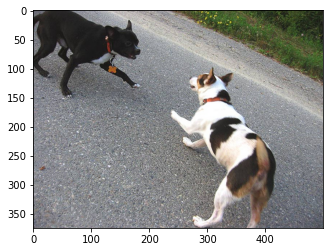

There is 21 images with 'cat' in description, first one:


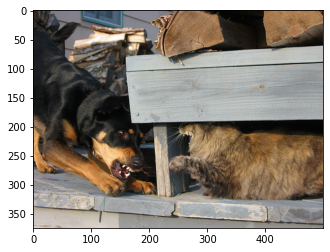

In [29]:
# get all images with dog in description
def check_for_word(word):
  dog_images = []
  for image_id, image_descriptions in descriptions.items():
    all_words = [word for desc in image_descriptions for word in desc.split()]
    if word in all_words:
      dog_images.append(image_id)
  return dog_images

print("There is %d images with 'dog' in description, first one:" % len(check_for_word('dog')))
plot_img(check_for_word('dog')[0] + '.jpg')

print("There is %d images with 'cat' in description, first one:" % len(check_for_word('cat')))
plot_img(check_for_word('cat')[0] + '.jpg')

In [30]:
# getting indexes of "dog" from InceptionV3 vectors
def get_idx_counts_from_vectors():
  idx_counts = {}
  for image_id in check_for_word('dog'):
    image_id = image_id + '.jpg'
    if image_id not in train_features.keys():
      continue
    idx = np.argmax(train_features[image_id])
    if idx not in idx_counts:
      idx_counts[idx] = 0
    idx_counts[idx] += 1
  return idx_counts

idx_counts = get_idx_counts_from_vectors()
print("Count of unique indexes: ")
len(idx_counts)

Count of unique indexes: 


563

In [34]:
#get images with vector max value at index
def get_vector_idx_images(vector_idx):
  idx_images = []
  for image_id in check_for_word('dog'):
    image_id = image_id + '.jpg'
    if image_id not in train_features.keys():
      continue
    idx = np.argmax(train_features[image_id])
    if idx == vector_idx:
      idx_images.append(image_id)
  return idx_images

best_idx = list(sorted(idx_counts.items(), key=lambda x: -x[1]))[0][0]
images = get_vector_idx_images(best_idx)

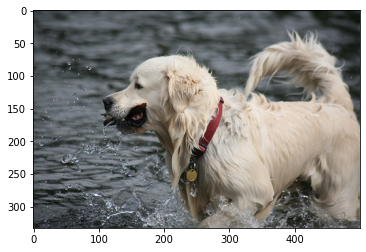

In [33]:
plot_img(images[2])